## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""
Build the experiment loop
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 13.6145 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [===

Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8857 - acc: 0.2906 - val_loss: 1.9836 - val_acc: 0.2461
Epoch 3/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.8143 - acc: 0.3401 - val_loss: 1.8823 - val_acc: 0.3219
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7696 - acc: 0.3578 - val_loss: 1.8363 - val_acc: 0.3502
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7427 - acc: 0.3680 - val_loss: 1.9156 - val_acc: 0.3197
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7360 - acc: 0.3754 - val_loss: 1.7425 - val_acc: 0.3720
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7088 - acc: 0.3845 - val_loss: 1.7660 - val_acc: 0.3705
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.6967 - acc: 0.3920 - val_loss: 1.6990 - val_acc: 0.3850
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 4s 79us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [=============

50000/50000 [==============================] - 4s 76us/step - loss: 1.6877 - acc: 0.4055 - val_loss: 1.7099 - val_acc: 0.3907
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6293 - acc: 0.4246 - val_loss: 1.6463 - val_acc: 0.4203
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5854 - acc: 0.4392 - val_loss: 1.6405 - val_acc: 0.4232
Epoch 6/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5502 - acc: 0.4517 - val_loss: 1.6871 - val_acc: 0.3930
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5161 - acc: 0.4655 - val_loss: 1.5389 - val_acc: 0.4486
Epoch 8/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4844 - acc: 0.4760 - val_loss: 1.5133 - val_acc: 0.4618
Epoch 9/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4571 - acc: 0.4837 - val_loss: 1.5437 - val_acc: 0.4387
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 79us/step - loss: 1.4924 - acc: 0.4709 - val_loss: 1.4771 - val_acc: 0.4720
Epoch 5/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4446 - acc: 0.4884 - val_loss: 1.4899 - val_acc: 0.4648
Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4058 - acc: 0.5017 - val_loss: 1.4914 - val_acc: 0.4663
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3624 - acc: 0.5162 - val_loss: 1.4978 - val_acc: 0.4668
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3348 - acc: 0.5258 - val_loss: 1.4358 - val_acc: 0.4940
Epoch 9/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3007 - acc: 0.5371 - val_loss: 1.5397 - val_acc: 0.4595
Epoch 10/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2699 - acc: 0.5529 - val_loss: 1.5068 - val_acc: 0.4775
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 79us/step - loss: 1.3965 - acc: 0.5020 - val_loss: 1.4351 - val_acc: 0.4878
Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3591 - acc: 0.5172 - val_loss: 1.4611 - val_acc: 0.4788
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3222 - acc: 0.5290 - val_loss: 1.4352 - val_acc: 0.4896
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2876 - acc: 0.5428 - val_loss: 1.3881 - val_acc: 0.5079
Epoch 9/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2590 - acc: 0.5518 - val_loss: 1.4727 - val_acc: 0.4839
Epoch 10/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2297 - acc: 0.5604 - val_loss: 1.3597 - val_acc: 0.5195
Epoch 11/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.1946 - acc: 0.5739 - val_loss: 1.4649 - val_acc: 0.4860
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 4s 78us/step - loss: 1.3945 - acc: 0.5036 - val_loss: 1.4507 - val_acc: 0.4851
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3578 - acc: 0.5147 - val_loss: 1.4550 - val_acc: 0.4881
Epoch 8/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3347 - acc: 0.5226 - val_loss: 1.4493 - val_acc: 0.4917
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3077 - acc: 0.5327 - val_loss: 1.4494 - val_acc: 0.4920
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.2921 - acc: 0.5375 - val_loss: 1.4356 - val_acc: 0.5005
Epoch 11/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.2561 - acc: 0.5530 - val_loss: 1.4444 - val_acc: 0.4975
Epoch 12/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2384 - acc: 0.5579 - val_loss: 1.4106 - val_acc: 0.5026
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 4s 79us/step - loss: 1.8039 - acc: 0.3707 - val_loss: 1.8003 - val_acc: 0.3705
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7810 - acc: 0.3789 - val_loss: 1.7719 - val_acc: 0.3794
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7608 - acc: 0.3861 - val_loss: 1.7584 - val_acc: 0.3855
Epoch 10/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7428 - acc: 0.3924 - val_loss: 1.7374 - val_acc: 0.3917
Epoch 11/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7260 - acc: 0.3970 - val_loss: 1.7237 - val_acc: 0.3977
Epoch 12/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7107 - acc: 0.4040 - val_loss: 1.7079 - val_acc: 0.4059
Epoch 13/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.6967 - acc: 0.4073 - val_loss: 1.6991 - val_acc: 0.4031
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 80us/step - loss: 1.6309 - acc: 0.4288 - val_loss: 1.6300 - val_acc: 0.4232
Epoch 9/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6072 - acc: 0.4364 - val_loss: 1.6013 - val_acc: 0.4321
Epoch 10/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5836 - acc: 0.4448 - val_loss: 1.5854 - val_acc: 0.4438
Epoch 11/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5627 - acc: 0.4520 - val_loss: 1.5672 - val_acc: 0.4488
Epoch 12/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5436 - acc: 0.4595 - val_loss: 1.5517 - val_acc: 0.4526
Epoch 13/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5266 - acc: 0.4664 - val_loss: 1.5391 - val_acc: 0.4561
Epoch 14/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5112 - acc: 0.4700 - val_loss: 1.5246 - val_acc: 0.4596
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 7s 144us/step - loss: 1.4836 - acc: 0.4795 - val_loss: 1.5078 - val_acc: 0.4671
Epoch 10/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4582 - acc: 0.4886 - val_loss: 1.4802 - val_acc: 0.4764
Epoch 11/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4361 - acc: 0.4957 - val_loss: 1.4935 - val_acc: 0.4652
Epoch 12/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4125 - acc: 0.5029 - val_loss: 1.4613 - val_acc: 0.4815
Epoch 13/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.3931 - acc: 0.5103 - val_loss: 1.4402 - val_acc: 0.4868
Epoch 14/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.3713 - acc: 0.5178 - val_loss: 1.4438 - val_acc: 0.4877
Epoch 15/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.3529 - acc: 0.5233 - val_loss: 1.4172 - val_acc: 0.4973
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 7s 144us/step - loss: 1.2738 - acc: 0.5525 - val_loss: 1.3796 - val_acc: 0.5063
Epoch 11/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2416 - acc: 0.5612 - val_loss: 1.3656 - val_acc: 0.5157
Epoch 12/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.2129 - acc: 0.5719 - val_loss: 1.3662 - val_acc: 0.5159
Epoch 13/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1908 - acc: 0.5799 - val_loss: 1.3439 - val_acc: 0.5256
Epoch 14/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1619 - acc: 0.5895 - val_loss: 1.3377 - val_acc: 0.5277
Epoch 15/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.1484 - acc: 0.5926 - val_loss: 1.3649 - val_acc: 0.5205
Epoch 16/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.1278 - acc: 0.6005 - val_loss: 1.3549 - val_acc: 0.5275
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 7s 138us/step - loss: 2.0764 - acc: 0.2854 - val_loss: 2.0676 - val_acc: 0.2887
Epoch 12/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0625 - acc: 0.2890 - val_loss: 2.0544 - val_acc: 0.2952
Epoch 13/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0496 - acc: 0.2939 - val_loss: 2.0422 - val_acc: 0.2971
Epoch 14/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.0374 - acc: 0.2971 - val_loss: 2.0307 - val_acc: 0.3025
Epoch 15/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0261 - acc: 0.3018 - val_loss: 2.0197 - val_acc: 0.3049
Epoch 16/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0153 - acc: 0.3041 - val_loss: 2.0093 - val_acc: 0.3052
Epoch 17/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0050 - acc: 0.3070 - val_loss: 1.9996 - val_acc: 0.3095
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 8s 153us/step - loss: 1.9163 - acc: 0.3347 - val_loss: 1.9107 - val_acc: 0.3352
Epoch 13/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9034 - acc: 0.3383 - val_loss: 1.8989 - val_acc: 0.3384
Epoch 14/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8911 - acc: 0.3430 - val_loss: 1.8883 - val_acc: 0.3397
Epoch 15/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8803 - acc: 0.3455 - val_loss: 1.8774 - val_acc: 0.3448
Epoch 16/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8701 - acc: 0.3514 - val_loss: 1.8674 - val_acc: 0.3517
Epoch 17/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8607 - acc: 0.3535 - val_loss: 1.8593 - val_acc: 0.3514
Epoch 18/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8517 - acc: 0.3565 - val_loss: 1.8503 - val_acc: 0.3568
Epoch 19/50
50000/50000 [==============

50000/50000 [==============================] - 7s 134us/step - loss: 1.7821 - acc: 0.3786 - val_loss: 1.7795 - val_acc: 0.3803
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7708 - acc: 0.3845 - val_loss: 1.7688 - val_acc: 0.3849
Epoch 15/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7603 - acc: 0.3878 - val_loss: 1.7589 - val_acc: 0.3882
Epoch 16/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7504 - acc: 0.3911 - val_loss: 1.7500 - val_acc: 0.3860
Epoch 17/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7415 - acc: 0.3956 - val_loss: 1.7437 - val_acc: 0.3898
Epoch 18/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7331 - acc: 0.3986 - val_loss: 1.7314 - val_acc: 0.3991
Epoch 19/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7243 - acc: 0.4004 - val_loss: 1.7233 - val_acc: 0.4052
Epoch 20/50
50000/50000 [==============

50000/50000 [==============================] - 7s 141us/step - loss: 1.5523 - acc: 0.4595 - val_loss: 1.5594 - val_acc: 0.4559
Epoch 15/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5339 - acc: 0.4659 - val_loss: 1.5497 - val_acc: 0.4577
Epoch 16/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5202 - acc: 0.4687 - val_loss: 1.5345 - val_acc: 0.4616
Epoch 17/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5042 - acc: 0.4749 - val_loss: 1.5247 - val_acc: 0.4642
Epoch 18/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4921 - acc: 0.4778 - val_loss: 1.5166 - val_acc: 0.4649
Epoch 19/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4782 - acc: 0.4834 - val_loss: 1.5099 - val_acc: 0.4679
Epoch 20/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4648 - acc: 0.4876 - val_loss: 1.4942 - val_acc: 0.4748
Epoch 21/50
50000/50000 [==============

50000/50000 [==============================] - 7s 140us/step - loss: 2.2624 - acc: 0.1595 - val_loss: 2.2608 - val_acc: 0.1582
Epoch 16/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.2587 - acc: 0.1615 - val_loss: 2.2571 - val_acc: 0.1606
Epoch 17/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.2550 - acc: 0.1635 - val_loss: 2.2535 - val_acc: 0.1643
Epoch 18/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2515 - acc: 0.1658 - val_loss: 2.2501 - val_acc: 0.1663
Epoch 19/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.2481 - acc: 0.1682 - val_loss: 2.2467 - val_acc: 0.1700
Epoch 20/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2449 - acc: 0.1701 - val_loss: 2.2434 - val_acc: 0.1722
Epoch 21/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2416 - acc: 0.1730 - val_loss: 2.2402 - val_acc: 0.1751
Epoch 22/50
50000/50000 [==============

50000/50000 [==============================] - 8s 153us/step - loss: 2.1901 - acc: 0.2261 - val_loss: 2.1889 - val_acc: 0.2264
Epoch 17/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1845 - acc: 0.2293 - val_loss: 2.1835 - val_acc: 0.2314
Epoch 18/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.1791 - acc: 0.2328 - val_loss: 2.1782 - val_acc: 0.2353
Epoch 19/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1739 - acc: 0.2354 - val_loss: 2.1729 - val_acc: 0.2385
Epoch 20/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.1687 - acc: 0.2387 - val_loss: 2.1678 - val_acc: 0.2387
Epoch 21/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.1636 - acc: 0.2410 - val_loss: 2.1628 - val_acc: 0.2412
Epoch 22/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.1587 - acc: 0.2449 - val_loss: 2.1579 - val_acc: 0.2429
Epoch 23/50
50000/50000 [==============

50000/50000 [==============================] - 8s 151us/step - loss: 2.1155 - acc: 0.2517 - val_loss: 2.1114 - val_acc: 0.2536
Epoch 18/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1074 - acc: 0.2545 - val_loss: 2.1036 - val_acc: 0.2579
Epoch 19/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.0996 - acc: 0.2590 - val_loss: 2.0959 - val_acc: 0.2606
Epoch 20/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0921 - acc: 0.2622 - val_loss: 2.0884 - val_acc: 0.2647
Epoch 21/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0847 - acc: 0.2654 - val_loss: 2.0812 - val_acc: 0.2671
Epoch 22/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.0776 - acc: 0.2683 - val_loss: 2.0742 - val_acc: 0.2706
Epoch 23/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.0707 - acc: 0.2711 - val_loss: 2.0674 - val_acc: 0.2749
Epoch 24/50
50000/50000 [==============

50000/50000 [==============================] - 8s 158us/step - loss: 1.8401 - acc: 0.3580 - val_loss: 1.8380 - val_acc: 0.3539
Epoch 19/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8315 - acc: 0.3611 - val_loss: 1.8302 - val_acc: 0.3600
Epoch 20/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.8235 - acc: 0.3642 - val_loss: 1.8219 - val_acc: 0.3609
Epoch 21/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8158 - acc: 0.3666 - val_loss: 1.8153 - val_acc: 0.3644
Epoch 22/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8089 - acc: 0.3695 - val_loss: 1.8075 - val_acc: 0.3646
Epoch 23/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8020 - acc: 0.3716 - val_loss: 1.8009 - val_acc: 0.3686
Epoch 24/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7956 - acc: 0.3747 - val_loss: 1.7944 - val_acc: 0.3694
Epoch 25/50
50000/50000 [==============

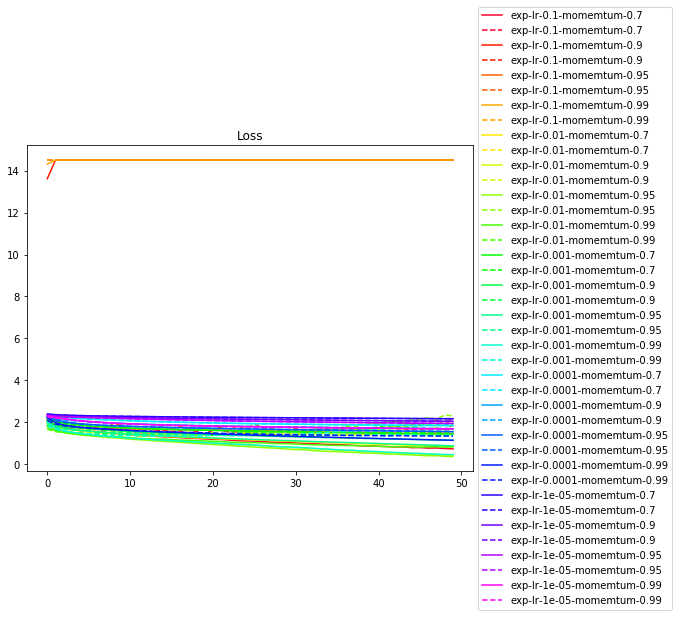

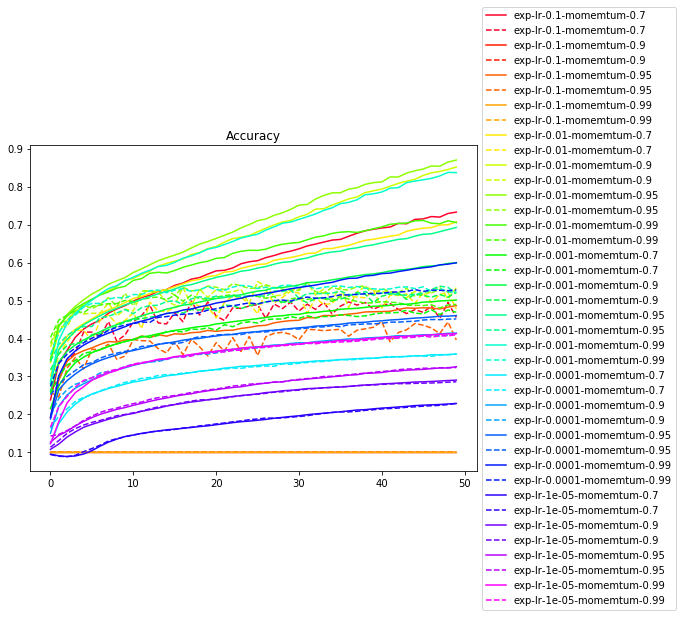

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""

#color_bar = ["r", "g", "b", "y", "m"]*5
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()